In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
data = pd.read_csv("dataset/HousePrice_Tehran.csv")

In [3]:
data.describe()

,Room,Price,Price(USD)
count,3479.000000,3.479000e+03,3.479000e+03
mean,2.079908,5.359023e+09,1.786341e+05
std,0.758275,8.099935e+09,2.699978e+05
min,0.000000,3.600000e+06,1.200000e+02
25%,2.000000,1.418250e+09,4.727500e+04
50%,2.000000,2.900000e+09,9.666667e+04
75%,2.000000,6.000000e+09,2.000000e+05
max,5.000000,9.240000e+10,3.080000e+06


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3479 entries, 0 to 3478
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Area        3479 non-null   object 
 1   Room        3479 non-null   int64  
 2   Parking     3479 non-null   bool   
 3   Warehouse   3479 non-null   bool   
 4   Elevator    3479 non-null   bool   
 5   Address     3456 non-null   object 
 6   Price       3479 non-null   float64
 7   Price(USD)  3479 non-null   float64
dtypes: bool(3), float64(2), int64(1), object(2)
memory usage: 146.2+ KB


In [5]:
## یک کپی از داده های اصلی گرفته و شروع به کار میکنیم 
data_copy = data

## تبدیل دیتا تایپ ستون مساحت از حالت رشته به حالت عددی
data_copy['Area'] = pd.to_numeric(data_copy['Area'], errors='coerce')

In [6]:
# در مرحله بعدی ستون های مربوط به پارکینگ ، آسانسور و انباری را به حالت عددی تبدیل میکنیم

data_copy['Parking'].replace({True:1, False:0},inplace=True)
data_copy['Warehouse'].replace({True:1, False:0} , inplace=True)
data_copy['Elevator'].replace({True:1, False:0} , inplace=True)


# با توجه به مشابه بودن ستون قیمت بر اساس ریال و دلار ، ستون قیمت بر حسب ریال رو حذف کنیم
data_copy = data_copy.drop(["Price"], axis=1)

In [7]:
min_repeat = 10
vc = data_copy['Address'].value_counts()
data_copy = data_copy[data_copy['Address'].isin(vc[vc > min_repeat].index)]
data_copy.Address.value_counts()
data_copy

,Area,Room,Parking,Warehouse,Elevator,Address,Price(USD)
0,63.0,1,1,1,1,Shahran,61666.67
1,60.0,1,1,1,1,Shahran,61666.67
2,79.0,2,1,1,1,Pardis,18333.33
3,95.0,2,1,1,1,Shahrake Qods,30083.33
4,123.0,2,1,1,1,Shahrake Gharb,233333.33
...,...,...,...,...,...,...,...
3474,86.0,2,1,1,1,Southern Janatabad,116666.67
3475,83.0,2,1,1,1,Niavaran,226666.67
3476,75.0,2,0,0,0,Parand,12166.67
3477,105.0,2,1,1,1,Dorous,186666.67


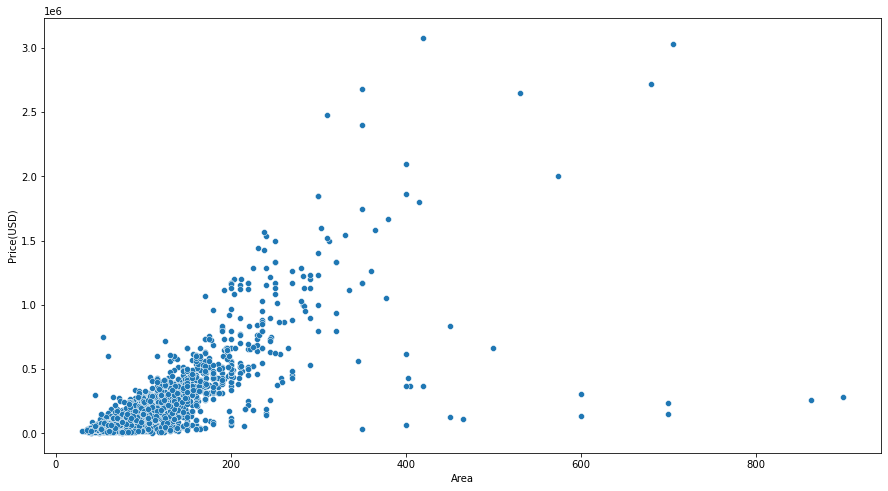

In [8]:
# بصری سازی قیمت و متراژ 
warnings.simplefilter(action="ignore", category=FutureWarning)
plt.figure(figsize=(15, 8))
sns.scatterplot(data_copy["Area"], data_copy["Price(USD)"]);

In [9]:
# با توجه به نمودار پراکندی بالا خانه هایی که متراژ آنها بیش از 200 متر می باشد حذف می شوند

data_copy.drop(data_copy[data_copy.Area > 200].index, inplace=True)
data_copy.drop(data_copy[data_copy.Area < 30].index, inplace=True)

In [10]:
data_copy.describe()

,Area,Room,Parking,Warehouse,Elevator,Price(USD)
count,2857.000000,2863.000000,2863.000000,2863.000000,2863.000000,2.863000e+03
mean,94.519076,2.000000,0.851904,0.923158,0.799511,1.381350e+05
std,35.841725,0.667714,0.355258,0.266388,0.400436,1.438984e+05
min,30.000000,0.000000,0.000000,0.000000,0.000000,2.000000e+03
25%,67.000000,2.000000,1.000000,1.000000,1.000000,4.482583e+04
50%,87.000000,2.000000,1.000000,1.000000,1.000000,8.833333e+04
75%,114.000000,2.000000,1.000000,1.000000,1.000000,1.766667e+05
max,200.000000,5.000000,1.000000,1.000000,1.000000,1.166667e+06


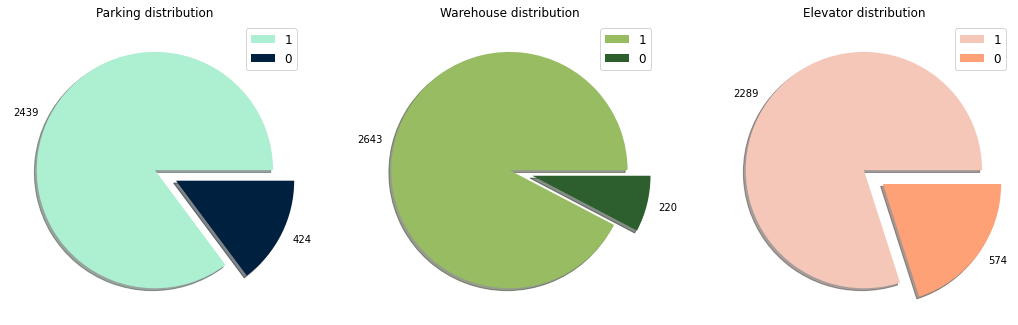

In [11]:
# در این مرحله بالانس بودن مقادیر را بررسی میکنیم

fig, ax = plt.subplots(ncols=3, figsize=(18,6))

colors = [['#ADEFD1FF', '#00203FFF'], ['#97BC62FF', '#2C5F2D'], ['#F5C7B8FF', '#FFA177FF']]
explode = [0, 0.2]
columns = ['Parking', 'Warehouse', 'Elevator']
for i in range(3):
        data = data_copy[columns[i]].value_counts()
        ax[i].pie(data, labels=data.values, explode=explode, colors=colors[i], shadow=True)
        ax[i].legend(labels=data.index, fontsize='large')
        ax[i].set_title('{} distribution'.format(columns[i]))